In [21]:
import numpy as np 
import pandas as pd 

#dataset used
#https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset
df = pd.read_csv("./us-counties.csv");
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [22]:
#drop fips Column since we don't need it
df = df.drop('fips', axis=1)

#Keep data of counties only in California
df = df[df["state"] == 'California']
df

,date,county,state,cases,deaths
5,2020-01-25,Orange,California,1,0
9,2020-01-26,Los Angeles,California,1,0
10,2020-01-26,Orange,California,1,0
14,2020-01-27,Los Angeles,California,1,0
15,2020-01-27,Orange,California,1,0
...,...,...,...,...,...
95639,2020-04-28,Tulare,California,578,35
95640,2020-04-28,Tuolumne,California,4,0
95641,2020-04-28,Ventura,California,513,17
95642,2020-04-28,Yolo,California,162,16


In [23]:
#get all the data of the most recent date into cur aka Current
cur = df.loc[df['date'] == "2020-04-28"]

#Only keep counties with more than 100 cases
cur = cur.loc[cur['cases'] > 100]

#reset index
cur.index= range(0, len(cur))

In [24]:
#store all the unique county names from cur, which will be all the counties with at least 100 cases
counties = []
counties = cur.county.unique()

In [25]:
#This while loop, trims df to only have the counties from cur, which are counties with at least 100 cases

i = 0
while(i < len(df)):                       #loop through all elements 
    if df.iloc[i].county not in counties: #if selected row's county is not in the counties list then it's removed
        df = df.drop(df.index[i])         #removes selected row, by drop the index
        i = i - 1                         #update i to reflect drop
    i = i + 1                             #updates i to be next index of next row

#reset index of dataframe
df.index = range(0, len(df)) 
    
#check if all the unique counties in datafram are same as counties list    
if len(counties) != len(df.county.unique()):
    print("Error")
else:
    print("Successful")

Successful


In [26]:
#create new days column, and initialize to 0
df['days'] = [0 for i in range(0,len(df))]
df

,date,county,state,cases,deaths,days
0,2020-01-25,Orange,California,1,0,0
1,2020-01-26,Los Angeles,California,1,0,0
2,2020-01-26,Orange,California,1,0,0
3,2020-01-27,Los Angeles,California,1,0,0
4,2020-01-27,Orange,California,1,0,0
...,...,...,...,...,...,...
1638,2020-04-28,Sonoma,California,228,2,0
1639,2020-04-28,Stanislaus,California,324,10,0
1640,2020-04-28,Tulare,California,578,35,0
1641,2020-04-28,Ventura,California,513,17,0


In [27]:
# This for loop cleans data of each county
# 1. Remove rows where new cases don't occur
# 2. Fixes Days column to reflect how many days have occured since first case of Covid-19 in that county

for i in counties:                    #select 1 county at a time
    temp = df[df["county"] == i]      #grab all rows of selected county
    temp.index = range(0,len(temp))   #reset index
    
    #remove rows where new cases don't occurr, by dropping duplicates of the same case number
    temp.drop_duplicates(subset ="cases", keep ='first', inplace = True) 
    
    #updates days column to have number of days since first instance of covid-19 via the index values
    temp['days'] = temp.index.values.tolist()
    temp.index = range(0,len(temp)) #reset index
    df = df[df.county != i]         #remove all selected county rows in dataframe
    df = pd.concat([df,temp], axis=0) #add in the cleaned county rows into dataframe
df.index= range(0,len(df)) #reset index
df

C:\Users\harpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\harpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,date,county,state,cases,deaths,days
0,2020-03-01,Alameda,California,1,0,0
1,2020-03-03,Alameda,California,2,0,2
2,2020-03-06,Alameda,California,3,0,5
3,2020-03-09,Alameda,California,24,0,8
4,2020-03-10,Alameda,California,25,0,9
...,...,...,...,...,...,...
1166,2020-04-23,Yolo,California,155,12,48
1167,2020-04-24,Yolo,California,157,13,49
1168,2020-04-25,Yolo,California,158,13,50
1169,2020-04-26,Yolo,California,161,14,51


In [28]:
df.county.unique()

array(['Alameda', 'Contra Costa', 'Fresno', 'Imperial', 'Kern',
       'Los Angeles', 'Marin', 'Merced', 'Monterey', 'Orange', 'Placer',
       'Riverside', 'Sacramento', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Solano', 'Sonoma',
       'Stanislaus', 'Tulare', 'Ventura', 'Yolo'], dtype=object)

In [94]:
#save the cleaned counties data
df.to_csv(r'C:\Users\harpr\Documents\CSCI 191T\Backup\California_counties.csv', index = False)

In [19]:
#
#
#
#
#
#

In [29]:
los = df[df["county"] == 'Los Angeles']
cla = df[df["county"] == 'Santa Clara']
ora = df[df["county"] == 'Orange']

In [30]:
#fixes index of each dataframe
los.index = [i for i in range(0,len(los))]
cla.index = [i for i in range(0,len(cla))]
ora.index = [i for i in range(0,len(ora))]

In [31]:
#removes days with no update in cases.
los.drop_duplicates(subset ="cases", keep ='first', inplace = True)
cla.drop_duplicates(subset ="cases", keep ='first', inplace = True) 
ora.drop_duplicates(subset ="cases", keep ='first', inplace = True) 

C:\Users\harpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harpr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [32]:
#re_indexes the dataframes
los.index = [i for i in range(0,len(los))]
cla.index = [i for i in range(0,len(cla))]
ora.index = [i for i in range(0,len(ora))]

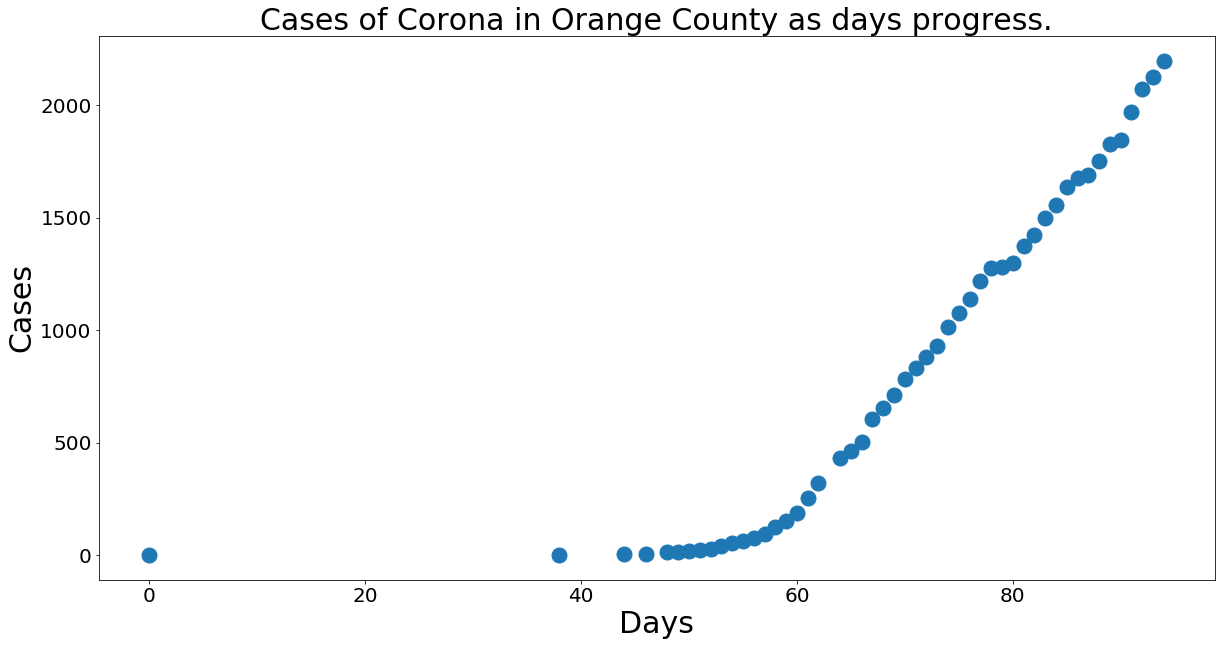

In [34]:
y=ora.cases
x=ora.days

%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Cases', fontsize = 30)
plt.xlabel('Days', fontsize = 30)
plt.title('Cases of Corona in Orange County as days progress.', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

In [9]:
#need to delete the day 0 result since it's outlier
ora.drop(ora.index[0], inplace = True)

#reset index
ora.index = [i for i in range(0,len(ora))]

#update days column by remove the new first day value from the rest of the day values
ora.days = ora.days - ora.days[0]

#remove the first case
ora.cases = ora.cases - 1

C:\Users\harpr\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\harpr\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,county,state,fips,cases,deaths,days
0,2020-03-03,Orange,California,6059.0,2,0,0
1,2020-03-09,Orange,California,6059.0,4,0,6
2,2020-03-11,Orange,California,6059.0,5,0,8
3,2020-03-13,Orange,California,6059.0,12,0,10
4,2020-03-14,Orange,California,6059.0,13,0,11
5,2020-03-15,Orange,California,6059.0,16,0,12
6,2020-03-16,Orange,California,6059.0,21,0,13
7,2020-03-17,Orange,California,6059.0,28,0,14
8,2020-03-18,Orange,California,6059.0,41,0,15
9,2020-03-19,Orange,California,6059.0,52,0,16


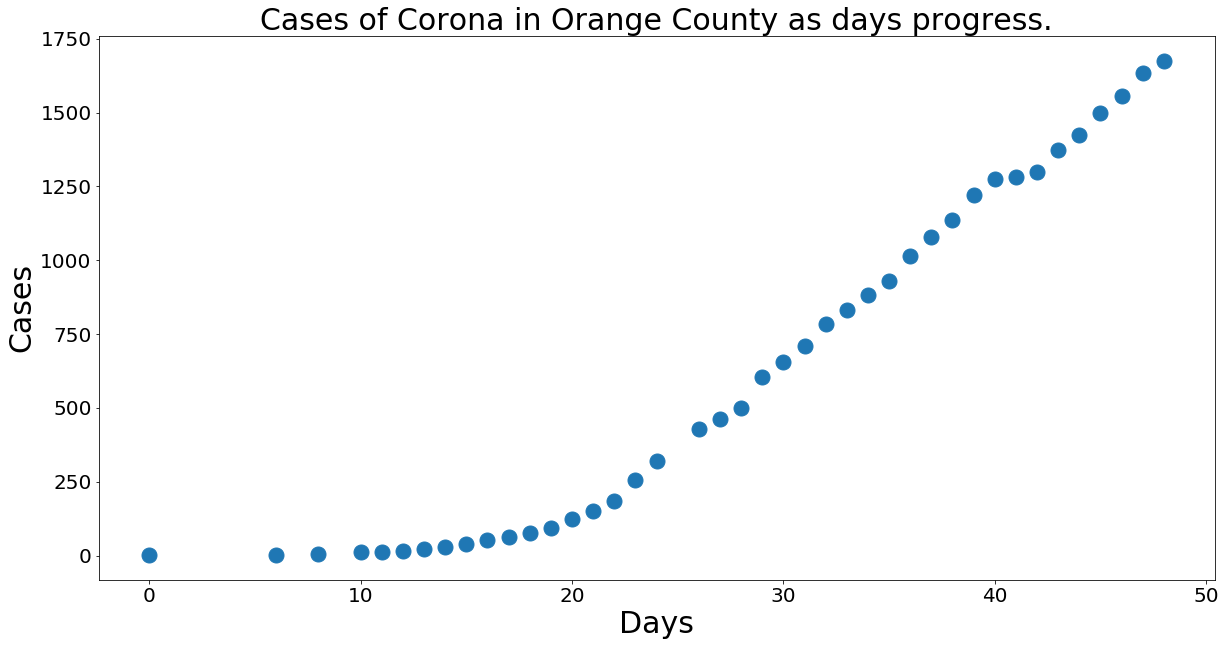

In [10]:
y=ora.cases
x=ora.days

%matplotlib inline

from matplotlib import pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Cases', fontsize = 30)
plt.xlabel('Days', fontsize = 30)
plt.title('Cases of Corona in Orange County as days progress.', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

In [11]:
#remove first 10 days to get a steep curve

for i in range(0,11):
    ora.drop(ora.index[0], inplace = True)
ora.index = [i for i in range(0,len(ora))]
ora.days = ora.days - ora.days[0]
ora

C:\Users\harpr\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\harpr\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,county,state,fips,cases,deaths,days
0,2020-03-21,Orange,California,6059.0,77,0,0
1,2020-03-22,Orange,California,6059.0,94,0,1
2,2020-03-23,Orange,California,6059.0,124,0,2
3,2020-03-24,Orange,California,6059.0,151,0,3
4,2020-03-25,Orange,California,6059.0,186,1,4
5,2020-03-26,Orange,California,6059.0,255,1,5
6,2020-03-27,Orange,California,6059.0,320,3,6
7,2020-03-29,Orange,California,6059.0,430,4,8
8,2020-03-30,Orange,California,6059.0,463,4,9
9,2020-03-31,Orange,California,6059.0,501,7,10


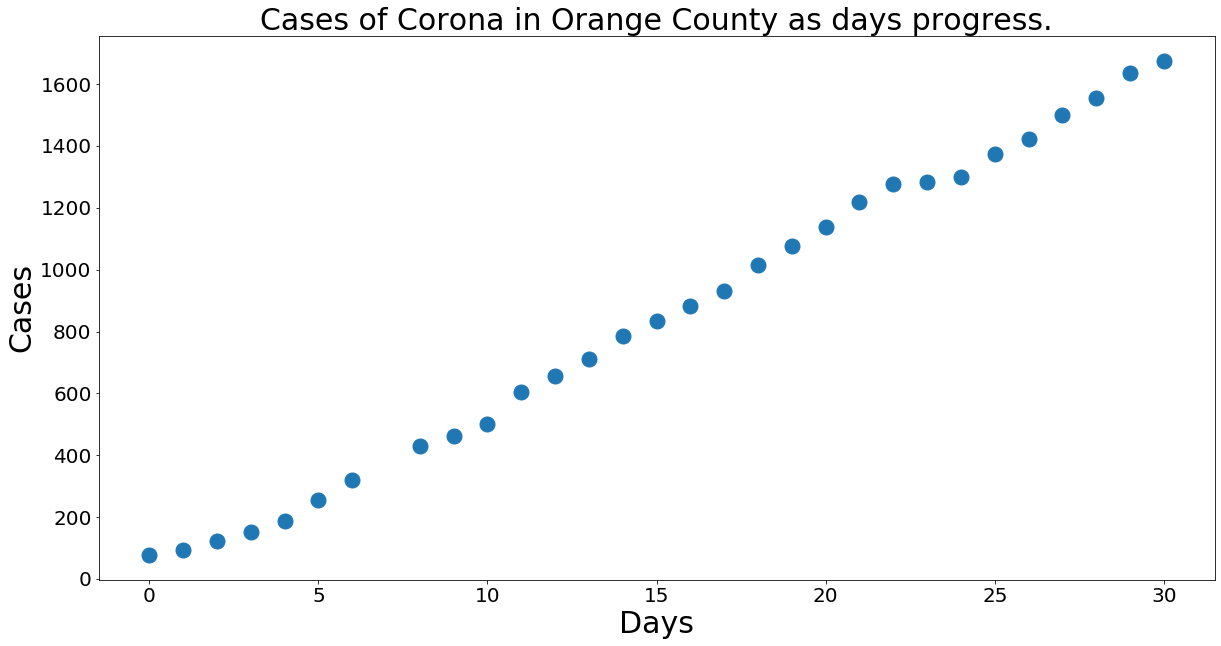

In [12]:
y=ora.cases
x=ora.days

%matplotlib inline

from matplotlib import pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Cases', fontsize = 30)
plt.xlabel('Days', fontsize = 30)
plt.title('Cases of Corona in Orange County as days progress.', fontsize = 30)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

In [13]:
import statistics as st
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 55.75.
The y-intercept is -2.10.
The best fit simple linear regression line is 55.75x + -2.10.


In [14]:
%matplotlib inline

# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 15.27 and y = 849.00.


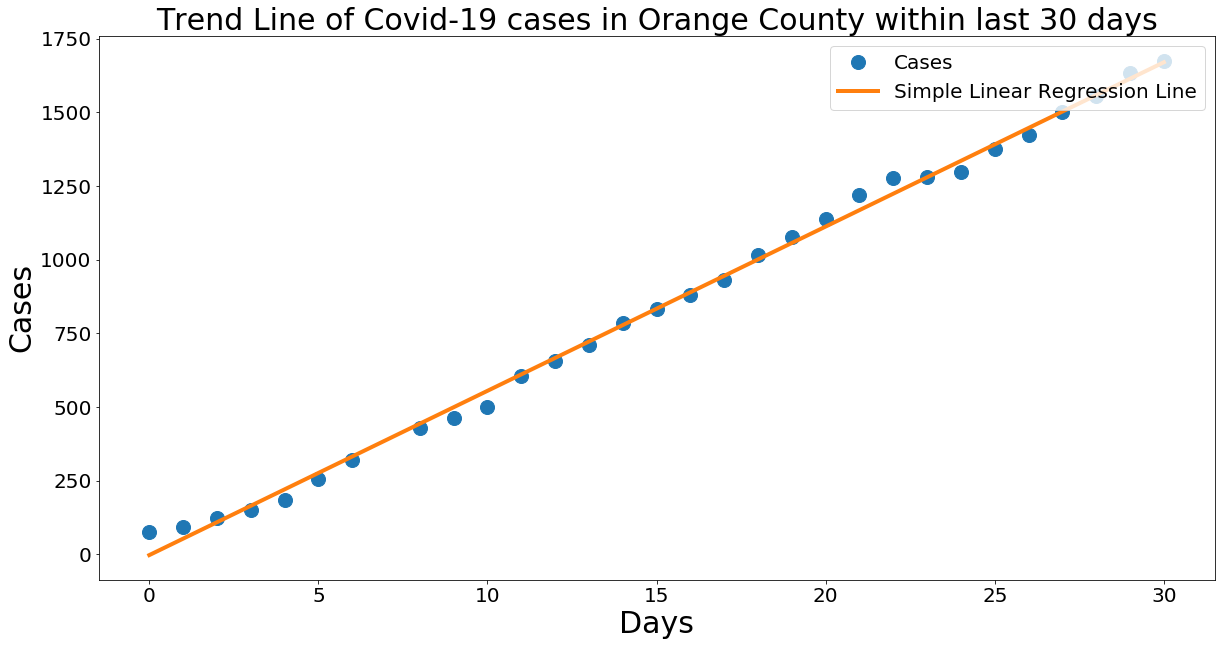

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Cases") 

## Plot the centroid point
#plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Cases', fontsize = 30)
plt.xlabel('Days', fontsize = 30)
plt.title('Trend Line of Covid-19 cases in Orange County within last 30 days', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
#plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
#plt.title('Regression Line Orange County', fontsize = 30)
# Create legend
plt.legend(loc = 'upper right', fontsize = 20)